In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import np_utils

In [ ]:
dataset = pd.read_csv('heart.csv')

In [ ]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((272, 10), (272,), (31, 10), (31,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X, y, epochs=60, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/60
10/10 [==============================] - 1s 18ms/step - loss: 5.6886 - accuracy: 0.4554 - val_loss: 0.7738 - val_accuracy: 0.4194
Epoch 2/60
10/10 [==============================] - 0s 4ms/step - loss: 1.2188 - accuracy: 0.4950 - val_loss: 0.7679 - val_accuracy: 0.4516
Epoch 3/60
10/10 [==============================] - 0s 4ms/step - loss: 0.8039 - accuracy: 0.5743 - val_loss: 0.7655 - val_accuracy: 0.4516
Epoch 4/60
10/10 [==============================] - 0s 4ms/step - loss: 0.7248 - accuracy: 0.6073 - val_loss: 0.7645 - val_accuracy: 0.4516
Epoch 5/60
10/10 [==============================] - 0s 4ms/step - loss: 0.7064 - accuracy: 0.5974 - val_loss: 0.7641 - val_accuracy: 0.4516
Epoch 6/60
10/10 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5842 - val_loss: 0.7638 - val_accuracy: 0.4516
Epoch 7/60
10/10 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5875 - val_loss: 0.7639 - val_accuracy: 0.4516
Epoch 8/60
10/10 [=

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

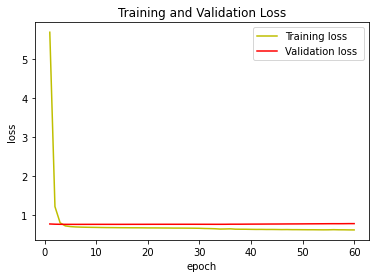

In [ ]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, len(loss)+1)
#acc=history.history['accuracy']
#val_acc=history.history['val_accuracy']
plt.plot(epochs,loss,'y',label='Training loss ')
plt.plot(epochs,val_loss,'r',label='Validation loss ')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

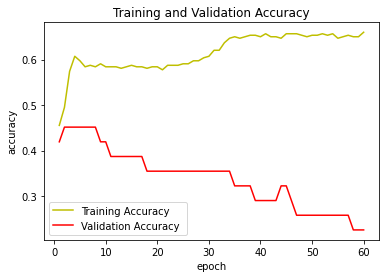

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,'y',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy ')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

0.2142857142857143


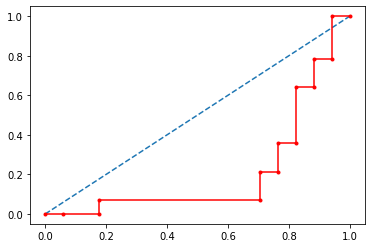

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from tensorflow import keras
probs=model.predict(X_test)
probs=probs[:,0]
auc=roc_auc_score(y_test,probs)
print(auc)
fpr,tpr,thresh=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker=".",color="red")